# <center>ECEN 758 Data Mining and Analysis Project - Fall 2023<center>
<center>Developed by Team Jarvis <center>
<center>Team Members: Chris, Harika, Arun<center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb
#from skopt import BayesSearchCV
from keras.datasets import fashion_mnist
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from joblib import load

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

SEED = 42

In [ ]:
xgb.XGBClassifier(seed=SEED)

# Exploratory Data Analysis (EDA)

## (a) Descriptive statistics

### Loading Data

In [3]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [1]:
# Flatten each image in X_train
flattened_X_train = X_train.reshape(X_train.shape[0], -1)

# Count unique number of labels in y_train
unique_labels, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique_labels, counts))
print("Number of unique labels:", len(unique_labels))
print("Number of data points under each label:", label_counts)
print("\n" + "="*40 + "\n")

# Descriptive statistics (e.g., class distributions, data statistics)
class_distribution = pd.Series(y_train).value_counts().sort_index()
print("Class Distribution:\n", class_distribution)
print("\n" + "="*40 + "\n")

NameError: name 'X_train' is not defined

In [4]:
# Create a DataFrame for flattened_X_train
flattened_X_train_df = pd.DataFrame(flattened_X_train)

# Display data statistics
data_statistics = flattened_X_train_df.describe()
print("Data Statistics:\n", data_statistics)
print("\n" + "="*40 + "\n")

# Calculate mean, median, and standard deviation for each image
image_means = np.mean(X_train, axis=(1, 2))
image_medians = np.median(X_train, axis=(1, 2))
image_std_devs = np.std(X_train, axis=(1, 2))

Data Statistics:
                 0             1             2             3             4    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000800      0.005783      0.030083      0.103800      0.249683   
std        0.092554      0.249033      0.767868      2.512017      4.331376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    119.000000    164.000000    224.000000   

                5             6             7             8             9    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.414717      0.821667      2.224733      5.698667     14.434650   
std        5.827394      8.309935

In [5]:
# Create a DataFrame to display the statistics
image_statistics = pd.DataFrame({
    'Mean': image_means,
    'Median': image_medians,
    'Std Dev': image_std_devs
})

print("Image Statistics:\n", image_statistics)
print("\n" + "="*40 + "\n")


Image Statistics:
              Mean  Median     Std Dev
0       97.253827    44.0  101.792346
1      107.905612   110.0  100.831448
2       36.558673     0.0   49.698752
3       59.501276    14.0   64.849295
4       78.044643     0.0  103.843248
...           ...     ...         ...
59995   26.738520     0.0   55.254691
59996   54.542092     0.0   93.039153
59997   79.778061     0.0  107.510829
59998   42.742347    57.0   38.508645
59999   21.280612     0.0   48.536572

[60000 rows x 3 columns]




In [6]:
# Pixel Intensity Profiles:
# Calculate pixel intensity profiles along different axes
horizontal_profiles = np.mean(X_train, axis=1).mean(axis=1)
vertical_profiles = np.mean(X_train, axis=2).mean(axis=1)

# Create a DataFrame to display the profiles
pixel_profiles = pd.DataFrame({
    'Horizontal Profile': horizontal_profiles,
    'Vertical Profile': vertical_profiles
})

print("Pixel Intensity Profiles:\n", pixel_profiles)
print("\n" + "="*40 + "\n")

Pixel Intensity Profiles:
        Horizontal Profile  Vertical Profile
0               97.253827         97.253827
1              107.905612        107.905612
2               36.558673         36.558673
3               59.501276         59.501276
4               78.044643         78.044643
...                   ...               ...
59995           26.738520         26.738520
59996           54.542092         54.542092
59997           79.778061         79.778061
59998           42.742347         42.742347
59999           21.280612         21.280612

[60000 rows x 2 columns]




In [7]:
### Outlier Detection


# Identify outliers based on pixel intensity (e.g., using Z-score)
z_scores = (X_train.flatten() - np.mean(X_train.flatten())) / np.std(X_train.flatten())
outliers = np.where(np.abs(z_scores) > 3)

print("Number of outliers:", len(outliers[0]))
print("\n" + "="*40 + "\n")

Number of outliers: 0




In [8]:
## (b) Data visualization

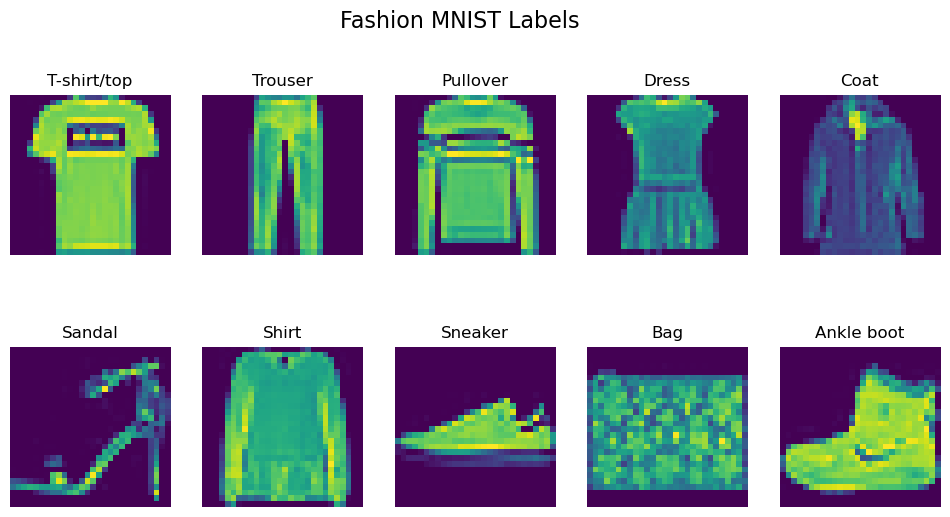

In [9]:
# Mapping of label indices to label names
label_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Display one image for each label in black and white
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Fashion MNIST Labels", fontsize=16)

for label in range(10):
    # Find the index of the first image with the given label
    index = np.where(y_train == label)[0][0]
    
    # Reshape the image to 28x28
    image = X_train[index].reshape(28, 28)
    
    # Display the image in black and white
    axs[label // 5, label % 5].imshow(image, cmap="viridis")
    axs[label // 5, label % 5].set_title(label_mapping[label])
    axs[label // 5, label % 5].axis("off")

plt.show()

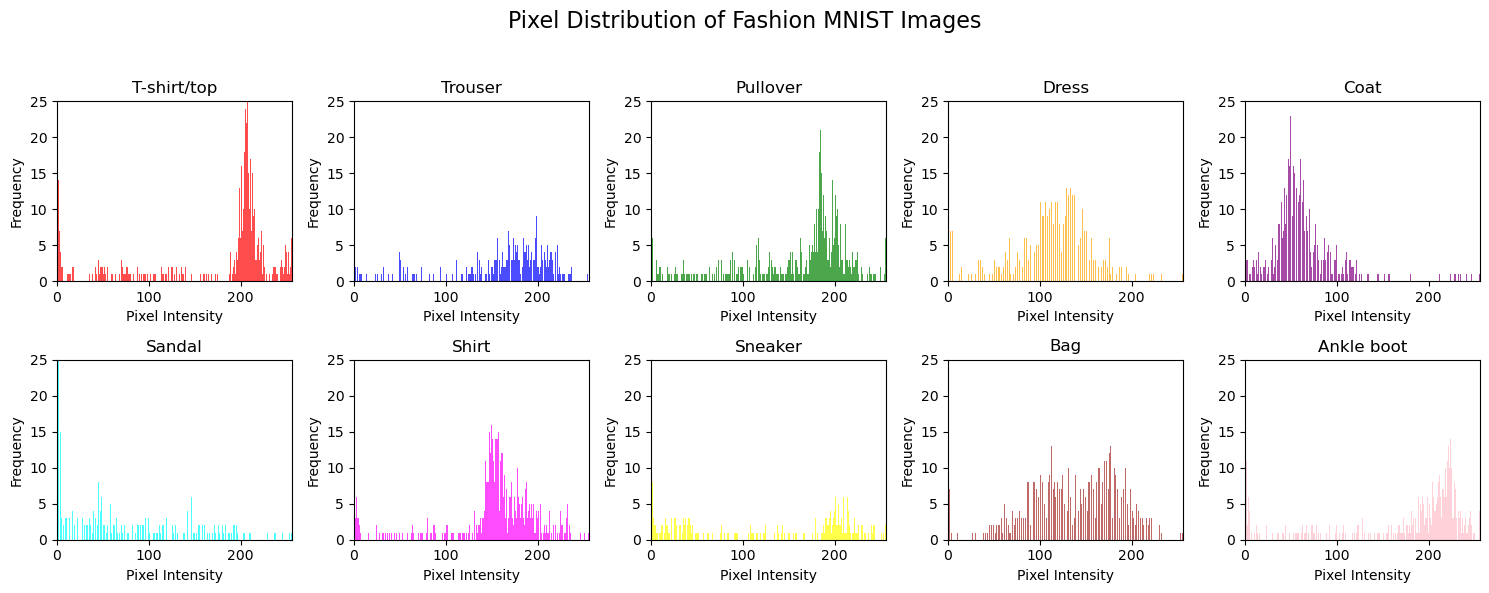

In [10]:
# Define a list of colors for histograms
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Create a 2x5 grid for subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Pixel Distribution of Fashion MNIST Images", fontsize=16)

# Display pixel distribution for each label in a single graph
for label in range(10):
    # Find the index of the first image with the given label
    index = np.where(y_train == label)[0][0]
    
    # Reshape the image to 28x28
    image = X_train[index].reshape(28, 28)
    
    # Flatten the image to a 1D array for histogram
    pixel_values = image.flatten()
    
    # Plot the pixel distribution histogram with different colors
    axs[label // 5, label % 5].hist(pixel_values, bins=256, range=(0, 256), color=colors[label], alpha=0.7)
    axs[label // 5, label % 5].set_title(label_mapping[label])
    axs[label // 5, label % 5].set_xlabel("Pixel Intensity")
    axs[label // 5, label % 5].set_ylabel("Frequency")
    axs[label // 5, label % 5].set_xlim([0, 256])
    axs[label // 5, label % 5].set_ylim([0, 25])  # Set y-axis limit to 50

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Explained variation per principal component: [0.29039228 0.1775531  0.06019222]


        PC1       PC2       PC3  label
0 -0.486250  6.404213 -4.749181      9
1  5.521290 -1.771142 -1.023636      0
2 -2.846709 -4.320934  0.416291      0
3  0.123132 -3.847324  0.794435      3
4  3.153409 -4.710466 -2.919126      0




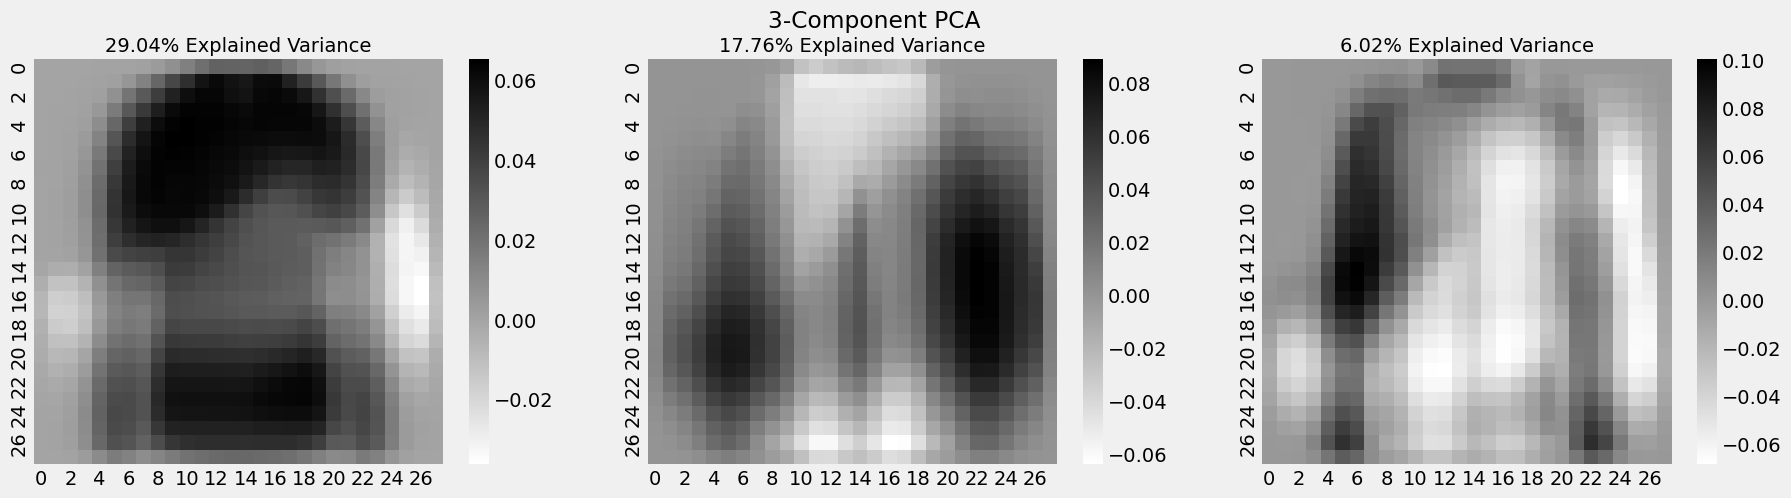

In [11]:
# Flatten the images and scale pixel values
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0

# Implement Principal Component Analysis (PCA)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train_flat)

# Explained variation per principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variation per principal component:", explained_variance_ratio)
print("\n" + "="*40 + "\n")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = y_train

# Preview the first few rows in the `pca_df` DataFrame
print(pca_df.head())
print("\n" + "="*40 + "\n")

# Set the graph style as 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))

# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)

# Set picture title to explained variance
axarr[0].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)

# Add picture title
plt.suptitle('3-Component PCA')

# Show the plots
plt.show()
print("\n" + "="*40 + "\n")


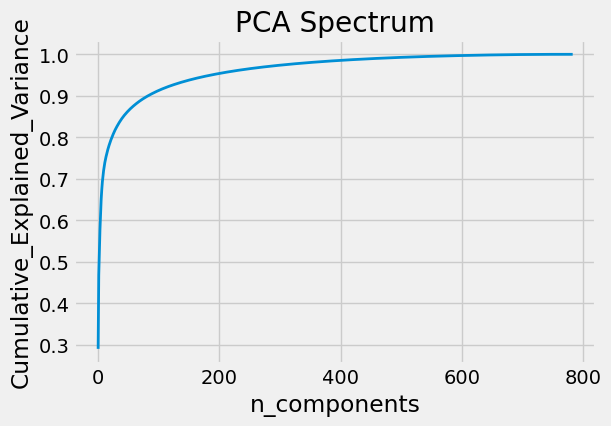

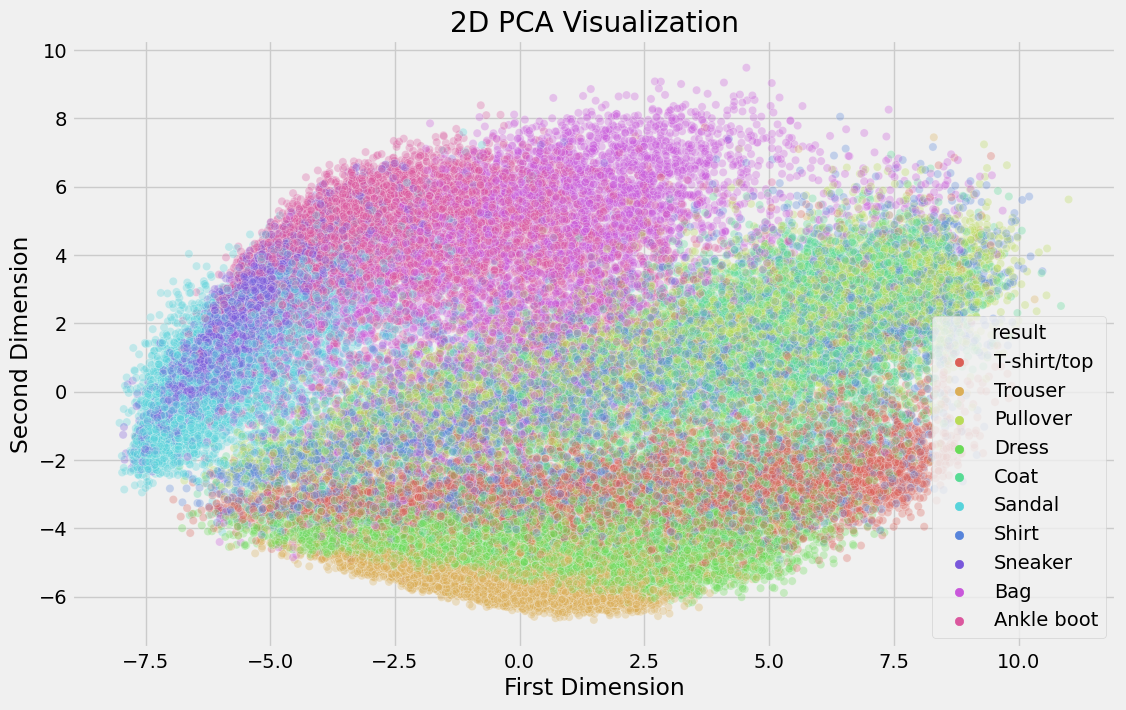

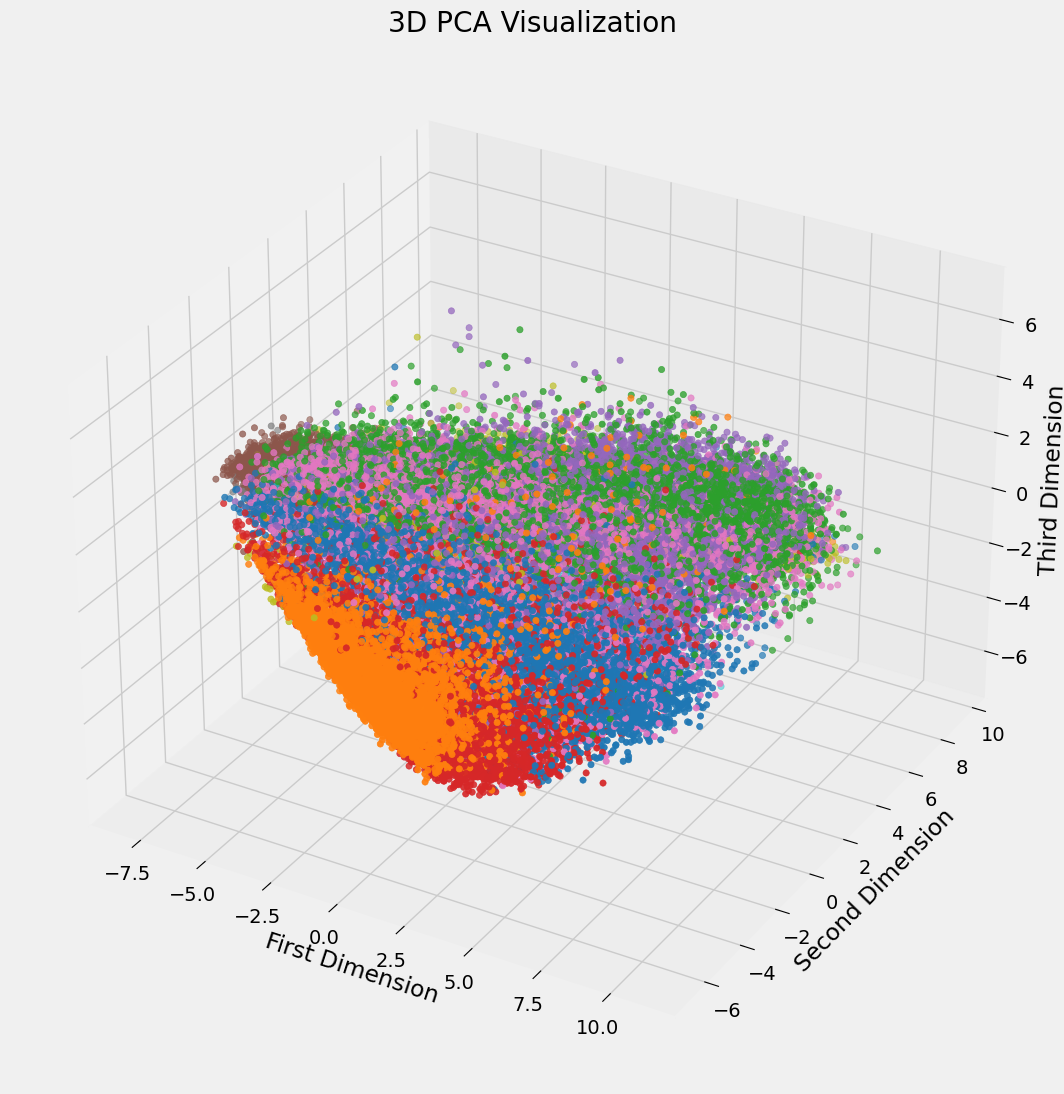

In [12]:
# initializing the pca
# Set n_components as 784 dimensions
pca = PCA(n_components=784)
# Fit on training data
pca_784 = pca.fit_transform(X_train_flat)

# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.title('PCA Spectrum')
# Show the plot
plt.show()
print("\n" + "="*40 + "\n")

# Create a DataFrame with PCA results (including the first 3 components)
pca_df = pd.DataFrame(data=pca_784[:, :3], columns=['First Dimension', 'Second Dimension', 'Third Dimension'])
pca_df['label'] = y_train
pca_df['result'] = pca_df['label'].map({
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
})

# Plot 2D PCA
plt.figure(figsize=(12, 7.5))
sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue="result",
    hue_order=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)
plt.title('2D PCA Visualization')
# Show the plot
plt.show()
print("\n" + "="*40 + "\n")

# Plot 3D PCA
fig = plt.figure(figsize=(12, 15))  # Adjust the figsize for the 3D plot
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot to create a 3D subplot
ax.scatter(
    xs=pca_df["First Dimension"],
    ys=pca_df["Second Dimension"],
    zs=pca_df["Third Dimension"],
    c=pca_df["label"],
    cmap='tab10'
)
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')
plt.title('3D PCA Visualization')
# Show the plot
plt.show()
print("\n" + "="*40 + "\n")



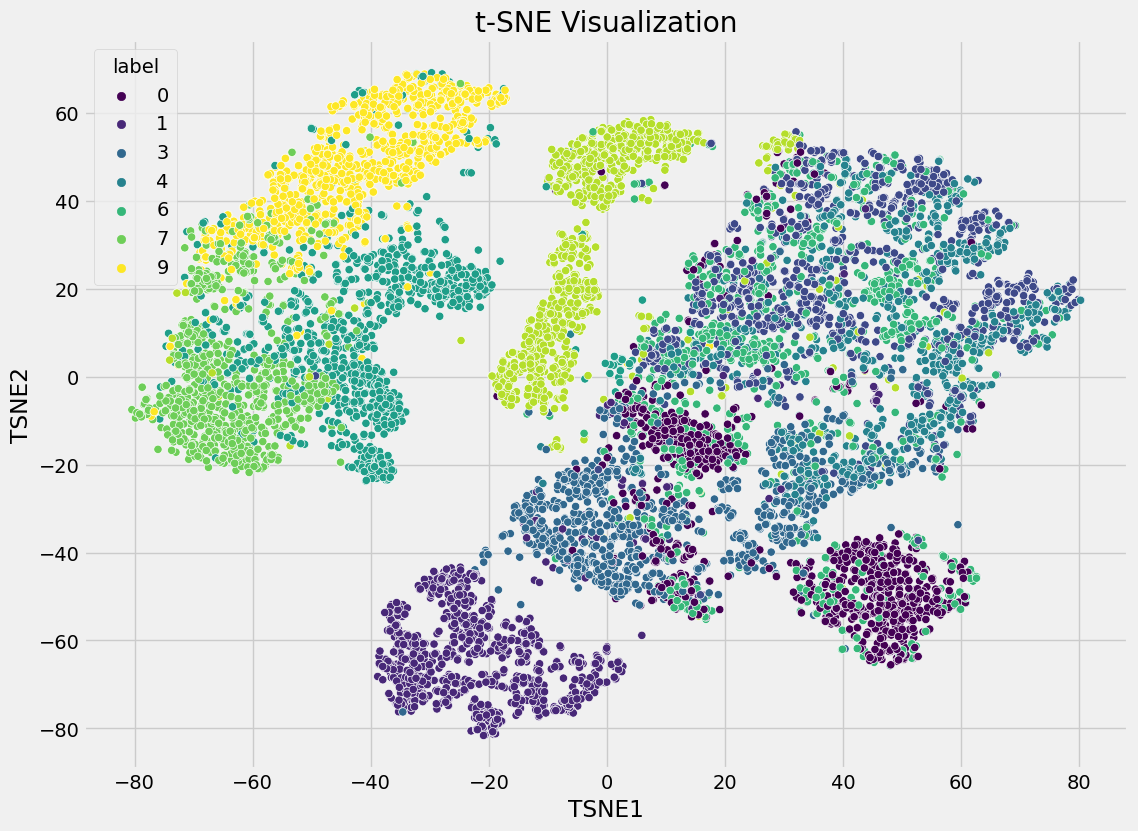

In [13]:
# Visualize using t-Distributed Stochastic Neighbouring Entities (t-SNE)
# Create a random generator to decrease potential biases in the data
np.random.seed(42)

# Pull 10000 pictures out of the sample
random_indices = np.random.choice(X_train_flat.shape[0], 10000, replace=False)
X_subset = X_train_flat[random_indices]
y_subset = y_train[random_indices]

# Run t-SNE algorithm
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_subset)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = y_subset

# Display the analysis results in a two-dimensional chart
plt.figure(figsize=(12, 9))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization')
# Show the plot
plt.show()

# Data Preparation

(a) Data cleansing and transformation  
(b) Data splitting (i.e., training, validation, and test splits)


In [14]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
# Flatten the images and scale pixel values to mean=0.0 and var=1.0
X_train = X_train.reshape(X_train.shape[0], -1)
X_train= (X_train - np.mean(X_train)) / np.std(X_train)

# Flatten the images and scale pixel values to mean=0.0 and var=1.0
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

In [16]:
#Cross Validation split
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
data_splits = stratified_kfold.split(X=X_train, y=y_train)

# Model building

# RANDOM FOREST CLASSIFIER

In [4]:
#Flattening each input image
X_train_flat = X_train.reshape(X_train.shape[0], 28*28)
X_test_flat = X_test.reshape(X_test.shape[0], 28*28)

#Normalizing
X_train_normalized = X_train_flat/255
X_test_normalized = X_test_flat/255

# Print the dimensions of the dataset after normalizing
print('Train: X = ', X_train_normalized.shape)
print('Test: X = ', X_test_normalized.shape)

#cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

Train: X =  (60000, 784)
Test: X =  (10000, 784)


In [5]:
# Print the dimensions of the dataset after normalizing
print('Train: X = ', X_train_normalized.shape)
print('Test: X = ', X_test_normalized.shape)

Train: X =  (60000, 784)
Test: X =  (10000, 784)


Evaluation for Default Random Forest:



Random Forest model with default parameters:

Test Accuracy: 87.64%
Precision: 0.8753
Recall: 0.8764
F1-Score: 0.8749


Confusion Matrix:


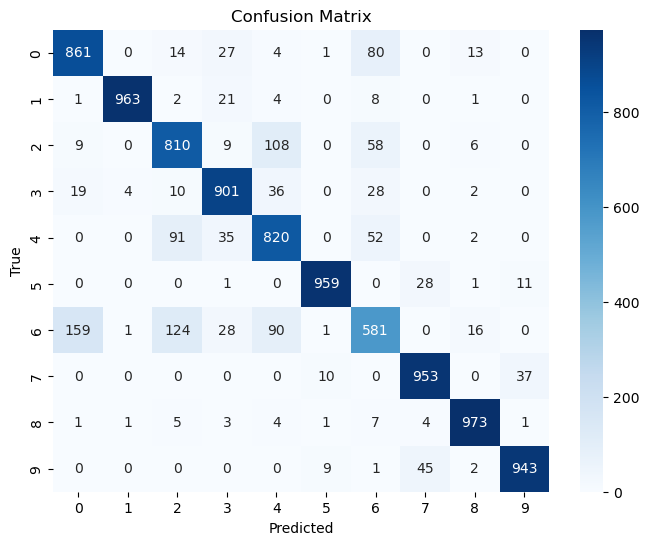

In [12]:
A = load('random_forest_classifier_default.joblib')

# Evaluate the default random forest 
print("Evaluation for Default Random Forest:")

y_test_pred = A.predict(X_test_normalized)

# Model evaluation on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("\n" + "="*40 + "\n")
print("\nRandom Forest model with default parameters:\n")

# Print evaluation metrics for the test set
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "="*40 + "\n")
print("Confusion Matrix:")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Hyperparameter Tuning

In [ ]:
#Best Hyperparameters (Random Forest): {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Evaluation for Hyper-tuned Random Forest:



Random Forest model with default parameters:

Test Accuracy: 87.64%
Precision: 0.8752
Recall: 0.8764
F1-Score: 0.8749


Confusion Matrix:


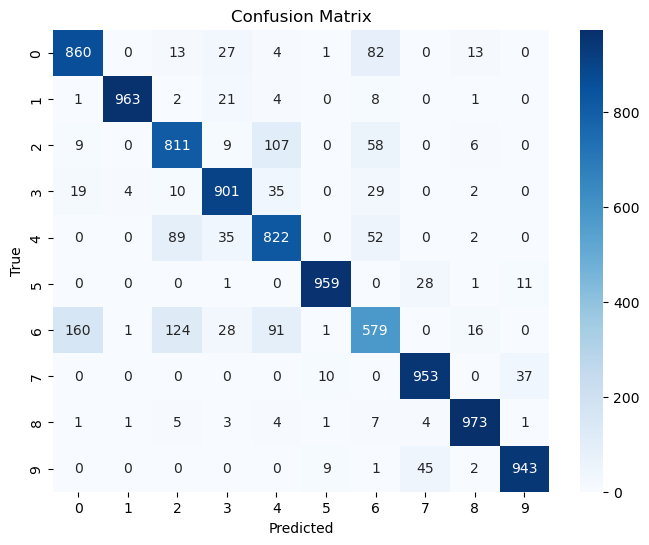

In [13]:
B = load('random_forest_classifier_hypertuned.joblib')
# Evaluate the hyper-tuned random forest 
print("Evaluation for Hyper-tuned Random Forest:")

y_test_pred = B.predict(X_test_normalized)

# Model evaluation on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("\n" + "="*40 + "\n")
print("\nRandom Forest model with default parameters:\n")

# Print evaluation metrics for the test set
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "="*40 + "\n")
print("Confusion Matrix:")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Interpretability


Feature Importance:
         Feature    Importance
546  feature_546  1.091544e-02
262  feature_262  7.491212e-03
602  feature_602  7.445132e-03
406  feature_406  7.040607e-03
574  feature_574  6.803885e-03
..           ...           ...
26    feature_26  2.462712e-06
55    feature_55  2.370630e-06
27    feature_27  2.072237e-06
1      feature_1  4.387575e-07
0      feature_0  3.610304e-07

[784 rows x 2 columns]


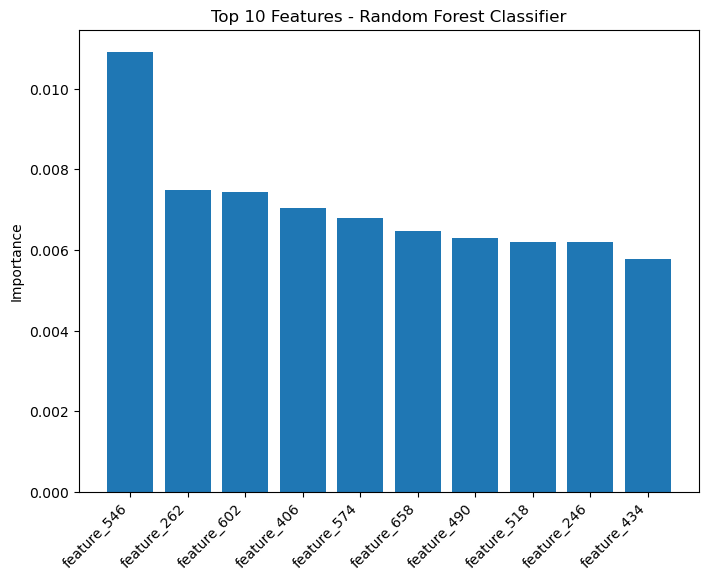

In [15]:
# Get feature importances from the trained model
feature_importances = B.feature_importances_

# If X_train is a NumPy array and doesn't have columns, create a list of feature names
feature_names = [f'feature_{i}' for i in range(X_train_normalized.shape[1])]

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance table
print("\nFeature Importance:")
print(feature_importance_df)

# Plot the top N important features
top_n = 10  # Change this value to display a different number of top features
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.ylabel('Importance')
plt.title(f'Top {top_n} Features - Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()